In [1]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt

etc = pd.read_csv('youtube_trot1.csv',encoding='utf-8')


In [2]:
len(etc)

668

In [20]:
etc

,Unnamed: 0,ID,Comment
0,0,GoodMan,AmorFati=LoveFate=(자신의)운명을사랑하라.
1,1,장희지,자신에게실망하지마모든걸잘할순없어...고3인데이가사듣고울컥함
2,2,LSNk,겉으로척듣기엔뽕짝트로트인데자세히뜯어보면EDM이랑곡전개가똑같음ㅋㅋㅋㅋㅋ어쩐지끌리더라
3,3,사필귀정,"진짜몇십년만에""시대감각""을살린트롯트같은트롯트가나왔네요"
4,4,이진욱,이거진짜대한민국대히트곡이닼ㅋ
...,...,...,...
663,663,01151st,???이거BTS-IDOL아님???아~~맞다표절이지!
664,664,나정란,똥노래군요
665,665,프레디머큐리,"""MOAIFATI""머리란게다그런거지누구나M자머리야석상같은한명의유튜버를다구리치면서살지..."
666,666,GiangAnna,산다는게다그런거지누구나빈손으로와소설같은한편의얘기들을세상에뿌리며살지자신에게실망하지마모...


In [5]:
etc2=list(etc.Comment)
etc2[0:2]

['AmorFati=LoveFate=(자신의)운명을사랑하라.', '자신에게실망하지마모든걸잘할순없어...고3인데이가사듣고울컥함']

In [6]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['AmorFatiLoveFate자신의운명을사랑하라']

In [7]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

In [8]:
import time
import datetime
start = time.time()

In [9]:
dataset = []
for i in range(len(clean_title)):
    dataset.append(twitter_tag.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))


sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times=times[0]
print(times)

0:02:09


In [10]:
from gensim import corpora, models 
import gensim

In [11]:
high_score_reviews = dataset

In [12]:
high_score_reviews = [[y for y in x if not len(y)==1]
                       for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [13]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews,dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


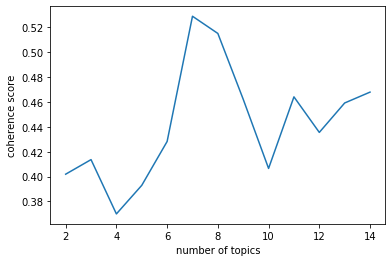

In [14]:
x = range(2,15)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [15]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

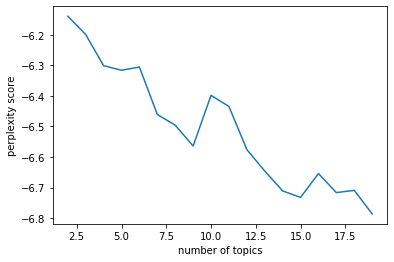

In [16]:
x=range(2,20)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [17]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=7,alpha=0.2,id2word = dictionary)

In [18]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.062*"노래" + 0.037*"파티" + 0.037*"김연자" + 0.018*"가사" + 0.013*"항상" + 0.011*"니체" + 0.010*"사람" + 0.010*"운명" + 0.010*"사랑" + 0.009*"마음" + 0.008*"탈모" + 0.008*"존경" + 0.007*"자신" + 0.007*"완전" + 0.006*"인생" + 0.006*"생각" + 0.006*"신나요" + 0.006*"방탄" + 0.006*"명곡" + 0.006*"철학"'),
 (1,
  '0.035*"파티" + 0.028*"노래" + 0.019*"김연자" + 0.019*"가슴" + 0.011*"머리" + 0.009*"대머리" + 0.009*"진짜" + 0.009*"눈물" + 0.009*"이제" + 0.008*"명곡" + 0.007*"필수" + 0.007*"빡빡" + 0.007*"숫자" + 0.007*"나이" + 0.006*"지금" + 0.006*"음악" + 0.006*"세상" + 0.006*"최고" + 0.006*"처음" + 0.006*"사랑"'),
 (2,
  '0.153*"파티" + 0.042*"노래" + 0.038*"사랑" + 0.024*"인생" + 0.017*"가슴" + 0.012*"눈물" + 0.011*"선택" + 0.011*"숫자" + 0.009*"슬픔" + 0.009*"나이" + 0.009*"화살" + 0.009*"운명" + 0.009*"마음" + 0.008*"가면" + 0.008*"추억" + 0.008*"이상" + 0.008*"안녕" + 0.008*"연애" + 0.008*"진짜" + 0.008*"지금"'),
 (3,
  '0.017*"사랑" + 0.017*"파티" + 0.017*"연애" + 0.017*"자신" + 0.014*"최고" + 0.012*"운명" + 0.012*"인생" + 0.012*"김연자" + 0.011*"숫자" + 0.011*"선택" + 0.011*"결혼" + 0.010*"필수" + 0.009*"사람" + 0.008*"느낌" 

In [19]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.084957 -0.028517       1        1  40.963421
2     -0.109782  0.016205       2        1  16.743042
0      0.075401  0.113558       3        1  12.243957
5      0.105755 -0.069347       4        1  10.631822
4      0.029787 -0.050838       5        1   8.644115
1      0.004642  0.001445       6        1   5.575799
3     -0.020847  0.017493       7        1   5.197852, topic_info=    Term        Freq       Total Category  logprob  loglift
41    파티  187.000000  187.000000  Default  30.0000  30.0000
20    노래   87.000000   87.000000  Default  29.0000  29.0000
26    머리   80.000000   80.000000  Default  28.0000  28.0000
25   대머리   36.000000   36.000000  Default  27.0000  27.0000
33   김연자   41.000000   41.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
30    오늘    1.010124   24.607492   Topic7  -5.0976  -0.2361
111   나이    0.978826   21.790977   Topic7  -5.1291  -0.1460
110   가슴    1.029402   36.851612   Topic7  -5.0787  -0.6210
377   탈모    0.793571   10.214993   Topic7  -5.3389   0.4019
497   가면    0.782847   24.967043   Topic7  -5.3525  -0.5054

[463 rows x 6 columns], token_table=      Topic      Freq Term
term                      
43        4  0.716238   가가
497       1  0.680898   가면
497       2  0.160211   가면
497       4  0.040053   가면
497       5  0.040053   가면
...     ...       ...  ...
604       6  0.840534   활동
494       5  0.677665   회수
77        4  0.479461   흥이
16        1  0.778912   히트
16        2  0.259637   히트

[614 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 1, 6, 5, 2, 4])